In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/CEMRE/Desktop/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


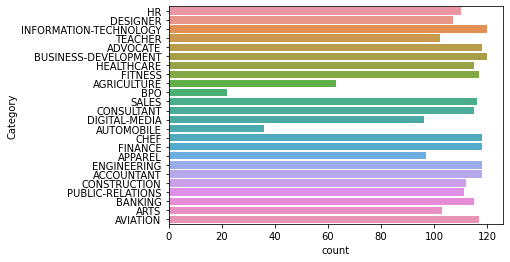

In [3]:
ax = sns.countplot(y="Category", data=df)

In [4]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [84]:
df['özg'] = df['Resume_str'].apply(lambda x: clean_text(x))
 
df.head()

,Resume_str,Category,özg
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admini...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,"hr specialist, u hr operation summary versatil..."
2,HR DIRECTOR Summary Over 2...,HR,hr director summary year experience recruiting...
3,HR SPECIALIST Summary Dedica...,HR,"hr specialist summary dedicated, driven, dynam..."
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlight hr skill hr departm...


In [7]:
df.pop('ID')
df.pop('Resume_html')
df

,Resume_str,Category,özg
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admini...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,"hr specialist, u hr operation summary versatil..."
2,HR DIRECTOR Summary Over 2...,HR,hr director summary year experience recruiting...
3,HR SPECIALIST Summary Dedica...,HR,"hr specialist summary dedicated, driven, dynam..."
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlight hr skill hr departm...
...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION,rank sgt e non commissioned officer charge bri...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION,"government relations, communication organizati..."
2481,GEEK SQUAD AGENT Professional...,AVIATION,geek squad agent professional profile support ...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION,program director office manager summary highly...


In [8]:
sample_corpora = df['özg'].iloc[:2].values
sample_corpora

array(['hr administrator marketing associate hr administrator summary dedicated customer service manager year experience hospitality customer service management respected builder leader customer focused team strives instill shared, enthusiastic commitment customer service highlight focused customer satisfaction team management marketing savvy conflict resolution technique training development skilled multi tasker client relation specialist accomplishment missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality system hilton onq , micros opera pm , fidelio opera reservation system or , holidex completed course seminar customer service, sale strategies, inventory control, loss prevention, safety, time management, leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name city , state h

In [9]:
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names()


sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
sample_df

C:\anacon1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absence,accomplished,accomplishment,accounting,accuracy,achieve,across,activity,addressed,administered,...,video,visual,web,website,well,western,work,working,worldwide,year
Doc0,1,1,1,2,1,0,0,1,0,0,...,0,0,0,2,1,0,0,2,1,1
Doc1,0,0,0,0,0,1,1,2,1,1,...,2,1,2,2,0,1,3,0,0,0


In [15]:
X_train, X_test , y_train, y_test = train_test_split(df['özg'].values,df['Category'].values,test_size=0.3,random_state=123,stratify=df['Category'].values)

In [16]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [18]:
classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [19]:
y_pred = classifier.predict(tfidf_test_vectors)

In [20]:
print(classification_report(y_pred,y_test))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.86      0.57      0.68        53
              ADVOCATE       0.37      0.59      0.46        22
           AGRICULTURE       0.26      1.00      0.42         5
               APPAREL       0.38      0.79      0.51        14
                  ARTS       0.19      0.40      0.26        15
            AUTOMOBILE       0.09      1.00      0.17         1
              AVIATION       0.83      0.83      0.83        35
               BANKING       0.57      0.53      0.55        38
                   BPO       0.00      0.00      0.00         0
  BUSINESS-DEVELOPMENT       0.50      0.53      0.51        34
                  CHEF       0.86      0.65      0.74        46
          CONSTRUCTION       0.79      0.66      0.72        41
            CONSULTANT       0.29      0.56      0.38        18
              DESIGNER       0.81      0.81      0.81        32
         DIGITAL-MEDIA       0.59      

C:\anacon1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anacon1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anacon1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


WORD EMBEDDİNG

In [23]:
vocabulary, counts = np.unique(df, return_counts=True)

vocabulary.shape, counts.shape

((4988,), (4988,))

In [25]:
def get_one_hot_vector(word):

    vec = np.zeros((vocabulary.shape[0], ))

    index = (vocabulary == word).argmax()

    vec[index] = 1

    return vec



dataset = []

for word in df:

    dataset.append(get_one_hot_vector(word))

dataset = np.asarray(dataset)

dataset.shape

(3, 4988)

In [26]:
X = np.zeros((dataset.shape[0]-1, dataset.shape[1]*2)) # Bigram



for i in range(X.shape[0]-1):

    X[i] = np.hstack((dataset[i], dataset[i+1]))

    

print(X[0], X[0].shape, X.shape)

[1. 0. 0. ... 0. 0. 0.] (9976,) (2, 9976)


In [28]:
y = dataset[1:]



X.shape, y.shape



((9976, ), (2, 9976))



split = int(0.85 * X.shape[0])



X_train = X[:split]

X_test = X[split:]

y_train = y[:split]

y_test = y[split:]



X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1, 9976), (1, 9976), (1, 4988), (1, 4988))

In [31]:
import keras

from keras.layers import Dense, Activation, Input, Dropout

from keras.models import Model

In [32]:
embedding = 300



inp = Input(shape=(9976,))

emb = Dense(embedding, activation='tanh')(inp)

emb = Dropout(0.4)(emb)

out = Dense(8756, activation='softmax')(emb)



model = Model(inputs=inp, outputs=out)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



encoder = Model(inputs=inp, outputs=emb)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9976)]            0         
                                                                 
 dense (Dense)               (None, 300)               2993100   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 8756)              2635556   
                                                                 
Total params: 5,628,656
Trainable params: 5,628,656
Non-trainable params: 0
_________________________________________________________________


In [73]:
a = encoder.predict(X)

w2v = {}

alpha = 0.9



for i in range(X.shape[0]):

    try:

        old_vec = w2v[vocabulary[y[i].argmax()]]

        new_vec = alpha*old_vec + (1-alpha)*a[i] # Running Average

        w2v[vocabulary[y[i].argmax()]] = new_vec

    except:

        w2v[vocabulary[y[i].argmax()]] = a[i]

print (len(w2v.keys()))

1


In [81]:
import transformers

In [88]:
## bert tokenizer

tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
## bert model
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
## return hidden layer with embeddings
input_ids = np.array(tokenizer.encode(X_train))[None,:]  
embedding = nlp(input_ids)
embedding[0][0]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


ValueError: Input [[1. 0. 0. ... 0. 0. 0.]] is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

In [90]:

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='özg')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

NameError: name 'bert_preprocess' is not defined

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size = 32)

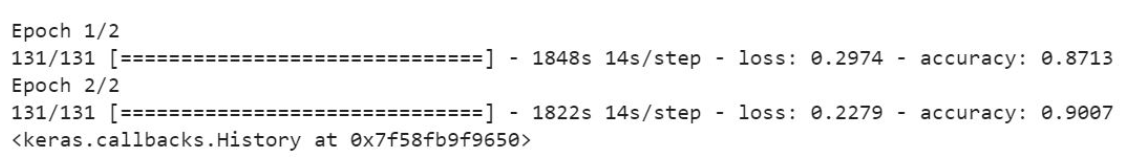